# Lanczos interpolation demo

This interactive notebook runs simple pulse scenarios through `lanczosinterp2D`
(from `interpdata.py`). Use the controls to change the scenario and interpolation
parameters, then click **Run** to see the interpolated output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Import lanczosinterp2D from interpdata.py; add cwd to sys.path if needed
try:
    from interpdata import lanczosinterp2D
except Exception:
    import sys
    sys.path.append('.')
    from interpdata import lanczosinterp2D

Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.
Doing lanczos interpolation with cutoff=0.225 and 3 lobes.


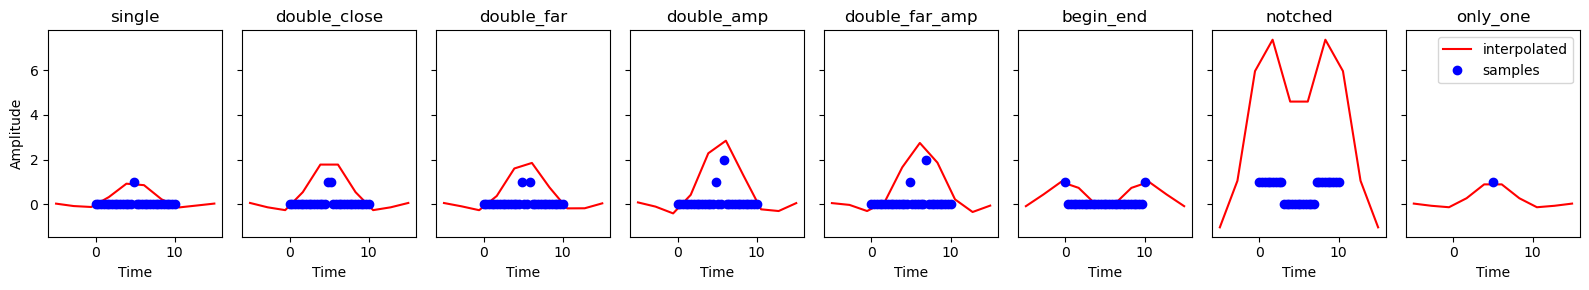

In [38]:
# Compare predefined scenarios side-by-side
scenarios = {
    'single': [(5.0, 1.0)],
    'double_close': [(5.0, 1.0), (5.2, 1.0)],
    'double_far': [(5.0, 1.0), (6.0, 1.0)],
    'double_amp': [(5.0, 1.0), (6.0, 2.0)],
    'double_far_amp': [(5.0, 1.0), (7.0, 2.0)],
    'begin_end': [(0, 1.0), (10, 1.0)],
    'notched': [(0, 1.0), (1.0, 1.0), (2.0, 1.0), (3.0, 1.0), (7, 1.0),(8.0, 1.0), (9.0, 1.0), (10, 1.0)],
    'only_one': [(5.0, 1.0)]
}

oldtime = np.linspace(0, 10, 30)
newtime = np.linspace(-5, 15, 10)

fig, axes = plt.subplots(1, len(scenarios), figsize=(16, 3), sharey=True)
for ax, (name, pulses) in zip(axes, scenarios.items()):
    data = np.zeros_like(oldtime)
    
    for t, amp in pulses:
        data[np.argmin(np.abs(oldtime - t))] += amp
    if name == 'only_one':
        oldtime = 5.0 + np.zeros(1) 
        data = 1.0 * np.ones_like(oldtime)
    if name == 'notched':
        # pulses that go from 0 to 3 and 7 to 10
        data = np.ones_like(oldtime)
        data[(oldtime > 3.0) & (oldtime < 7.0)] = 0.0
        
    interp = lanczosinterp2D(data.reshape(-1, 1), oldtime, newtime, window=3, cutoff_mult=0.5)[:, 0]
    ax.plot(newtime, interp, '-r', label='interpolated')
    ax.plot(oldtime, data, 'bo', label='samples')
    ax.set_title(name)
    ax.set_xlabel('Time')
axes[0].set_ylabel('Amplitude')
plt.tight_layout()
plt.legend()
plt.show()